In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
train = pd.read_csv('train.csv')

X_train = train.iloc[:, 0:10].values
y_train = train.iloc[:, 10].values 

X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0) #zscore normalisation

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
coefficients = np.zeros(X_train.shape[1]) #determining coefficients

X_train 


array([[ 1.        ,  0.65669017,  0.56985198, ...,  0.92852386,
        -1.51571947, -1.67745507],
       [ 1.        ,  0.65669017,  0.23765885, ...,  0.29725735,
        -0.98871868, -1.67745507],
       [ 1.        , -0.81127943, -0.3923626 , ..., -0.33400916,
        -1.38396928,  0.78721474],
       ...,
       [ 1.        , -0.81127943, -1.39848776, ..., -0.96527568,
        -0.75815584, -1.67745507],
       [ 1.        , -0.07729463,  0.26629619, ...,  0.92852386,
        -0.52759299,  0.54558045],
       [ 1.        ,  0.65669017, -0.15180895, ..., -0.96527568,
         0.62522124,  0.25561929]])

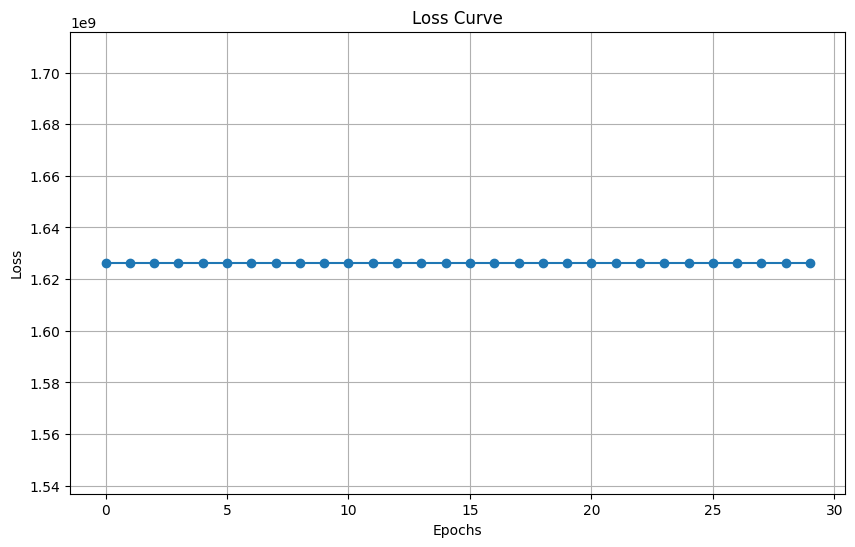

In [59]:
learning_rate = 0.1 #size of steps taken during each iteration
epochs = 30 #number of iterations to train the code on data
#generally more epochs means that accuracy will increase, but here above 30 epoches, it becomes redundant

loss_values = []
for e in range(epochs):
    loss = np.mean((y_train - value) ** 2)
    loss_values.append(loss)

#plotting loss curve
plt.figure(figsize=(10,6))
plt.plot(loss_values, marker='o', linestyle = '-')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [60]:
for e in range(epochs):
    value = np.dot(X_train, coefficients)
    errors = y_train - value
    coefficients += learning_rate * np.dot(errors, X_train) / len(y_train)

In [61]:

test = pd.read_csv('test.csv')

X_test = test.iloc[:, 0:10].values # Features -- Col 1 to 10
y_test = test.iloc[:, 10].values # Aim -- Col 11

X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

X_test = np.c_[np.ones(X_test.shape[0]), X_test] 
predictions = np.dot(X_test, coefficients)

In [62]:
def error(true, false):
    total_error = 0
    total_actual = 0

    for actual, predicted in zip(true, false):
        error = abs(actual - predicted)
        total_error += error
        total_actual += abs(actual)

    percentage_error = (total_error / total_actual) * 100
    return percentage_error

accuracy = 100 - error(y_test, predictions) 
print('Accuracy:', round(accuracy,2), '%')

Accuracy: 86.65 %
